# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [ ]:
!pip install seaborn # seaborn 설치

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
print(type(tips))
tips

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## rugplot, kdeplot, displot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

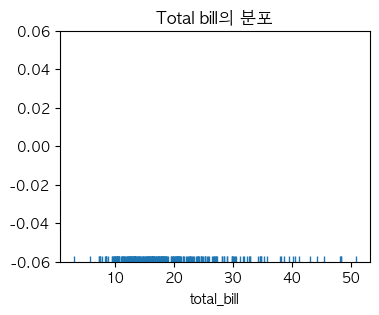

In [3]:
plt.figure(figsize = (4,3))

# sns.rugplot(tips['total_bill'],alpha = 0.5)
sns.rugplot(data = tips, x = 'total_bill') # data: DataFrame 지정. x='컬럼명'
plt.title('Total bill의 분포')
plt.show()

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

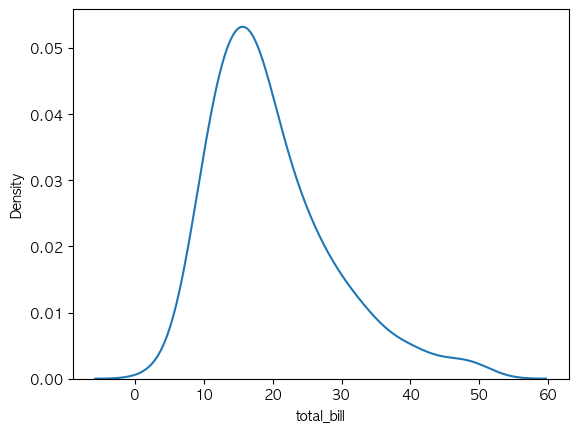

In [8]:
# sns.kdeplot(tips['total_bill'])
sns.kdeplot(x = 'total_bill', data = tips)
plt.show()

## displot()
- 히스토그램을 기준으로 rugplot, kdeplot을 같이 그릴 수 있다.

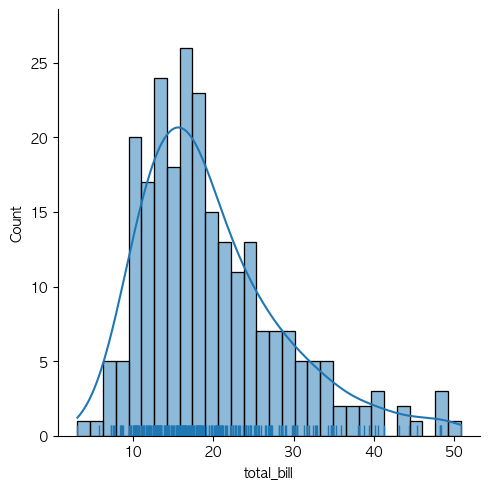

In [13]:
sns.displot(data = tips, x = 'total_bill', bins = 30,
           rug = True,
           kde = True)
plt.show()

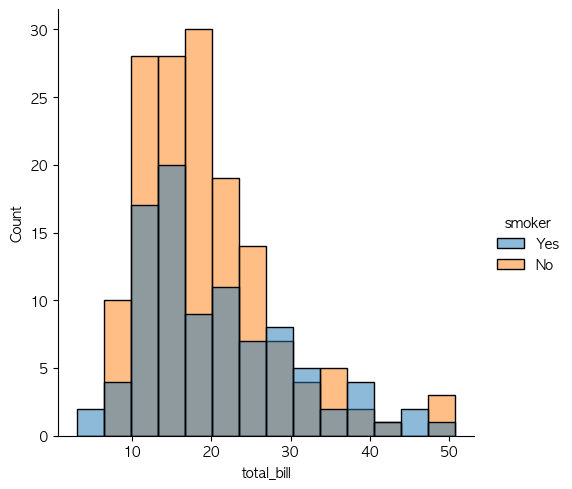

In [10]:
# tips.groupby('smoker')['total_bill']
sns.displot(data = tips, x = 'total_bill', hue = 'smoker')
plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

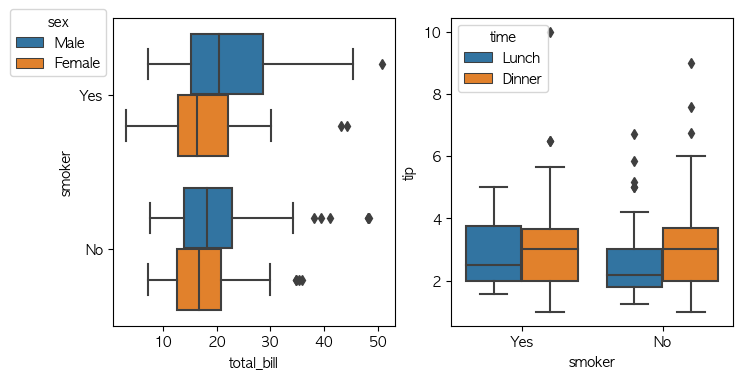

In [12]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# x(y): 연속형, y(x): 범주형
sns.boxplot(x = 'total_bill',
                y = 'smoker',hue = 'sex',
                 data = tips, ax = ax1)

sns.boxplot(y = 'tip', x = 'smoker', hue = 'time', data = tips, ax = ax2)

ax1.legend(bbox_to_anchor=(0,1.05), loc = 'upper right', title='sex')
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

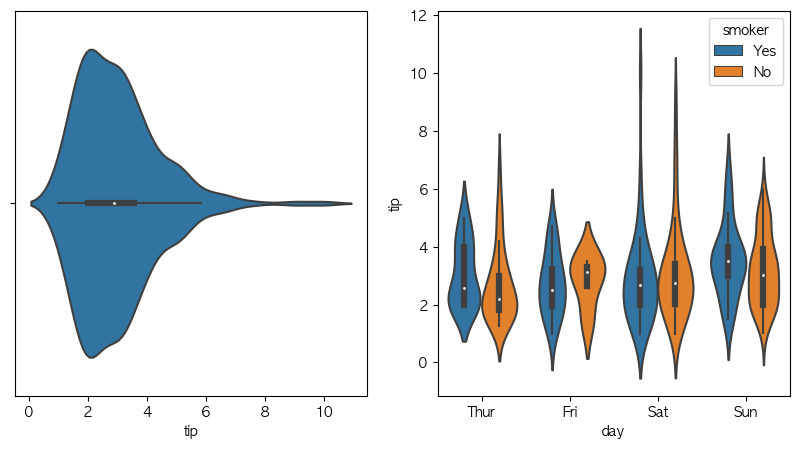

In [14]:
plt.figure(figsize = (10,5)) # 1분위부터 2분위까지의 값이 좀 크고 2분위 이후로는 조금씩 값이 떨어지고 잇다.
plt.subplot(1, 2, 1)
sns.violinplot(data = tips, x = 'tip')

plt.subplot(1, 2, 2)
sns.violinplot(data = tips, y = 'tip',   # y: 연속형, x: 범주형
               x = 'day',  
               hue = 'smoker') 
plt.show()

<AxesSubplot: xlabel='tip', ylabel='Density'>

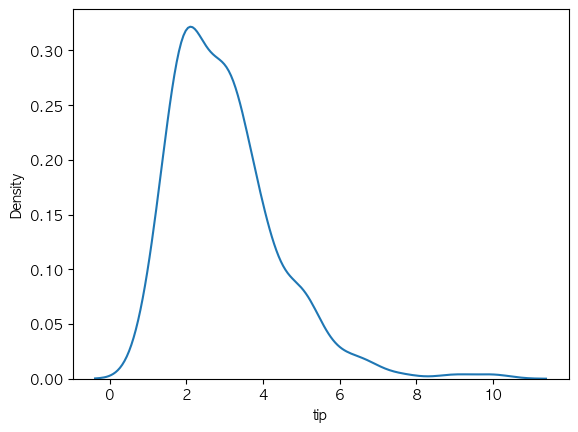

In [27]:
sns.kdeplot(data = tips, x = 'tip')

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

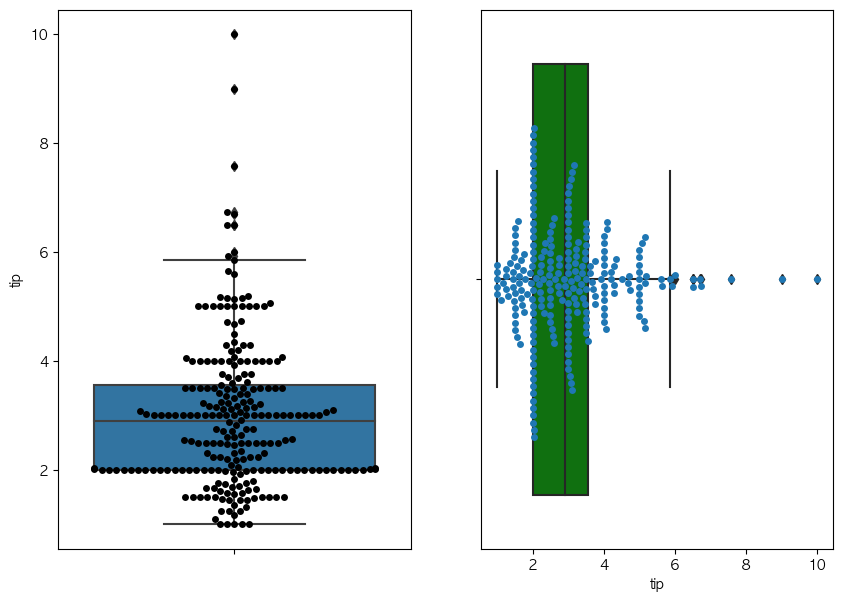

In [37]:
plt.figure(figsize = (10,7))
plt.subplot(1, 2, 1)
sns.boxplot(y='tip', data = tips)
sns.swarmplot(y = 'tip', data = tips, color = 'black')   # swamplot은 boxplot과 함께 나온다 , 보통 혼자 나오지 않는다.
                                                        # 

plt.subplot(1, 2, 2)
sns.boxplot(x = 'tip', data = tips, color = 'green')
sns.swarmplot(x = 'tip', data = tips)

plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

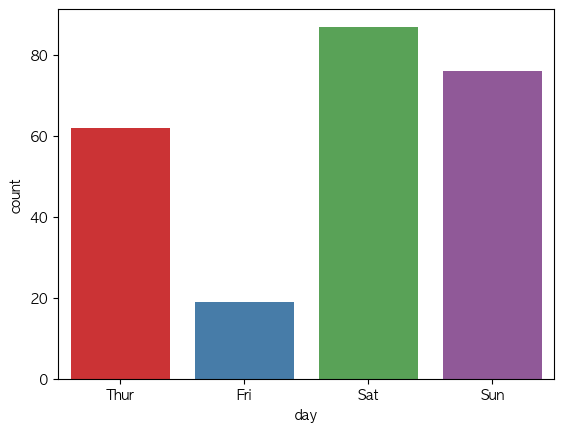

In [52]:
sns.countplot(data = tips, x = 'day')

plt.show()

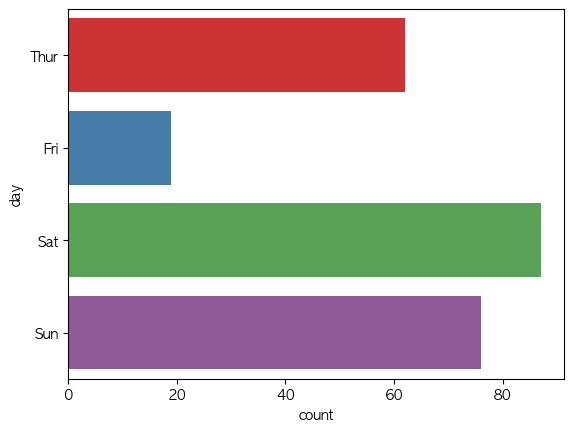

In [53]:
sns.countplot(data = tips, y = 'day')

plt.show()

<AxesSubplot: >

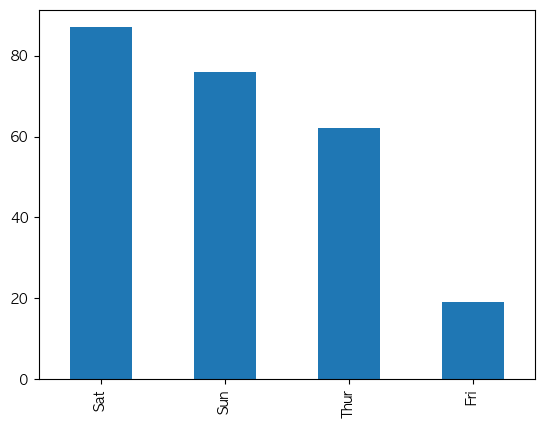

In [16]:
tips['day'].value_counts().plot(kind = 'bar')

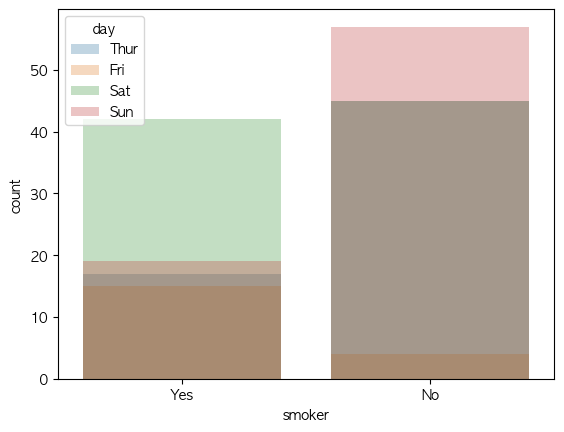

In [20]:
# 흡연 / 비흡연자 개수 요일별로 나눠서 시각화
sns.countplot( x = 'smoker', hue = 'day', data = tips,
             dodge = False, # 수평 누적막대 여부 : 기본- True
             alpha = 0.3)
plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [48]:
sns.set_palette('Set1') # 맨 먼저 적용하면 전체 적용 가능.

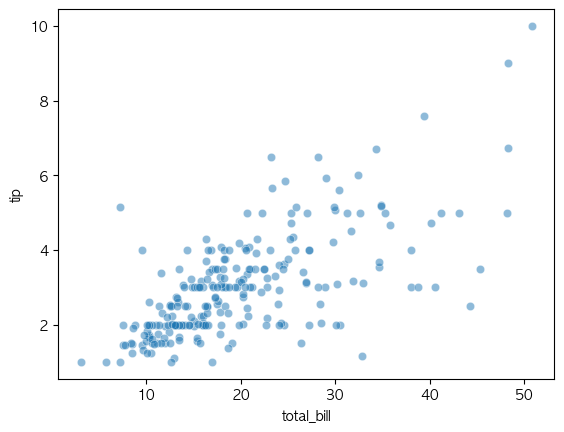

In [23]:
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', alpha = 0.5)
plt.show()

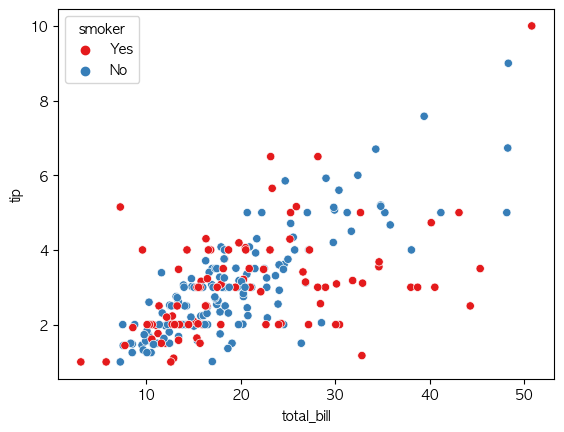

In [51]:
sns.scatterplot(data = tips, x = 'total_bill',
                y = 'tip', hue = 'smoker') # smoker 별로
               # palette = 'Set1')

plt.show()

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.

- 과거데이터 기반으로 미래를 예측하다
- 투명한 부분은 이 데이터의 오차이다.

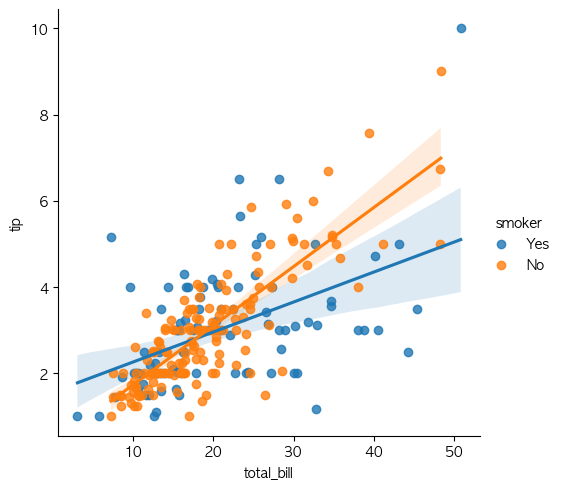

In [25]:
sns.lmplot(data = tips, x = 'total_bill',
           y = 'tip', hue = 'smoker')
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

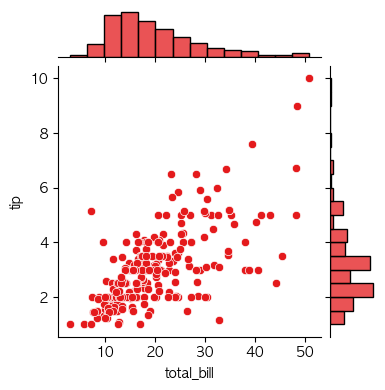

In [61]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip',
             height = 4)
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.
- 수치형 데이터만 표시한다.
- 같은 컬럼 끼리는 히스토그램으로 나타낸다.
- 다른 컬럼 끼리는 선점도를 나타낸다.

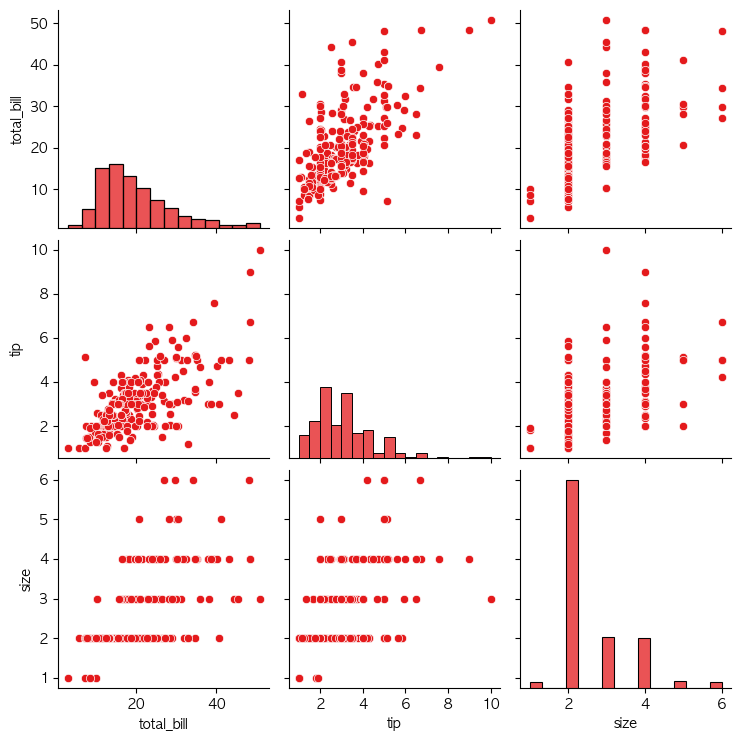

In [62]:
sns.pairplot(tips)
plt.show()

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [64]:
tips.corr()

/var/folders/nc/lry6d8ws417_mblykm_8wpc40000gn/T/ipykernel_13840/3825555837.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


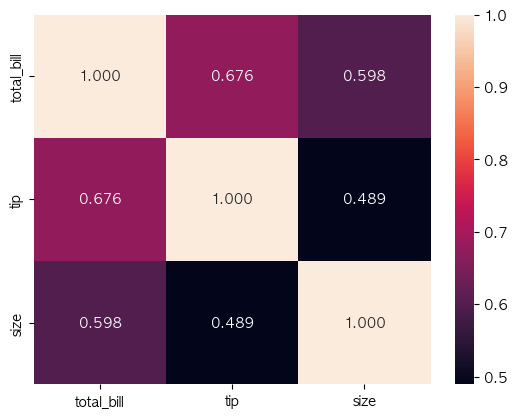

In [72]:
sns.heatmap(tips[['total_bill','tip','size']].corr(),
           annot = True, # annot = True 는 값 표현.
           fmt = '.3f') # 소수점 3자리수 까지 표현.
plt.show()

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [26]:
import pandas as pd
import numpy as np

index = pd.date_range('2023/01/01', freq = 'MS', periods = 10 )
values = np.random.randint(1, 100, size = (10,3))
df = pd.DataFrame(values, index = index, columns = ['no1', 'no2', 'no3'])

df

,no1,no2,no3
2023-01-01,22,55,36
2023-02-01,65,69,91
2023-03-01,12,29,19
2023-04-01,68,34,68
2023-05-01,30,58,15
2023-06-01,90,74,87
2023-07-01,94,8,2
2023-08-01,13,81,91
2023-09-01,45,70,84
2023-10-01,33,81,12


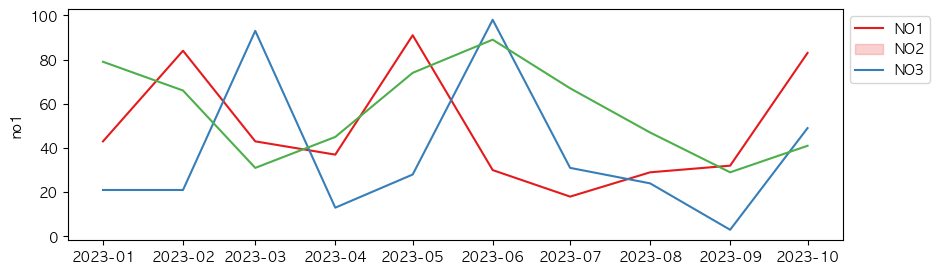

In [83]:
plt.figure(figsize = (10,3))
sns.lineplot(data = df, y = 'no1', x = df.index)
sns.lineplot(data = df, y = 'no2', x = df.index)
sns.lineplot(data = df, y = 'no3', x = df.index)

plt.legend(['NO1','NO2','NO3'],bbox_to_anchor = (1,1), loc = 'upper left')
plt.show()

In [84]:
df['cate'] = ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'C']
df

,no1,no2,no3,cate
2023-01-01,43,21,79,A
2023-02-01,84,21,66,B
2023-03-01,43,93,31,C
2023-04-01,37,13,45,A
2023-05-01,91,28,74,B
2023-06-01,30,98,89,C
2023-07-01,18,31,67,A
2023-08-01,29,24,47,B
2023-09-01,32,3,29,C
2023-10-01,83,49,41,C


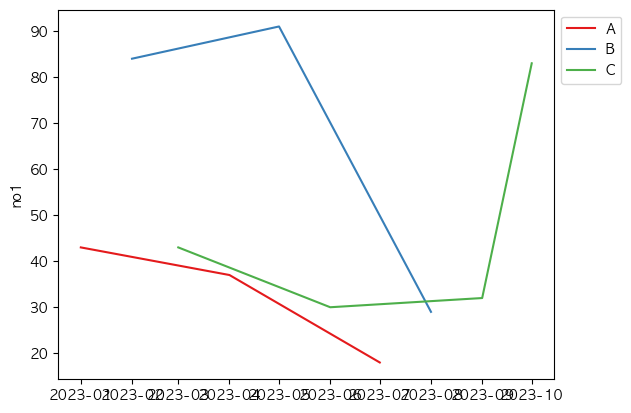

In [91]:
sns.lineplot(data = df, x = df.index, y = 'no1', hue = 'cate')
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
plt.show()

In [ ]:
def solution(n):
    if n // 2 == 0:
        answer = '수박'*(n//2)
        return answer
    elif n // 2 != 0:
        answer = ('수박'*(n//2)) + '수')
        return answer
    else:
        answer = '수'
        return answer
